In [26]:
#running sync
import time

start = time.perf_counter()


def do_something():
    print(f'Sleeping  second(s)...')
    time.sleep(1)
    print('Done Sleeping...')

do_something()
do_something()

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping  second(s)...
Done Sleeping...
Sleeping  second(s)...
Done Sleeping...
Finished in 2.01 second(s)


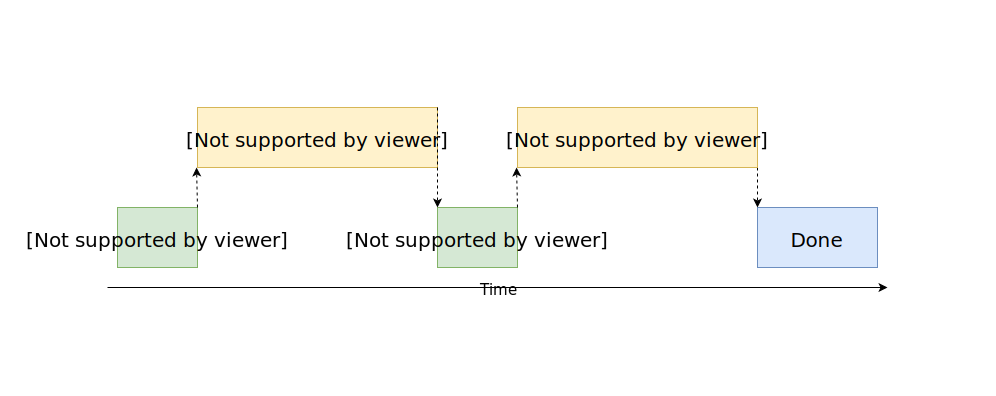

In [15]:
from IPython.display import SVG
SVG("multiprocessing-1.svg")

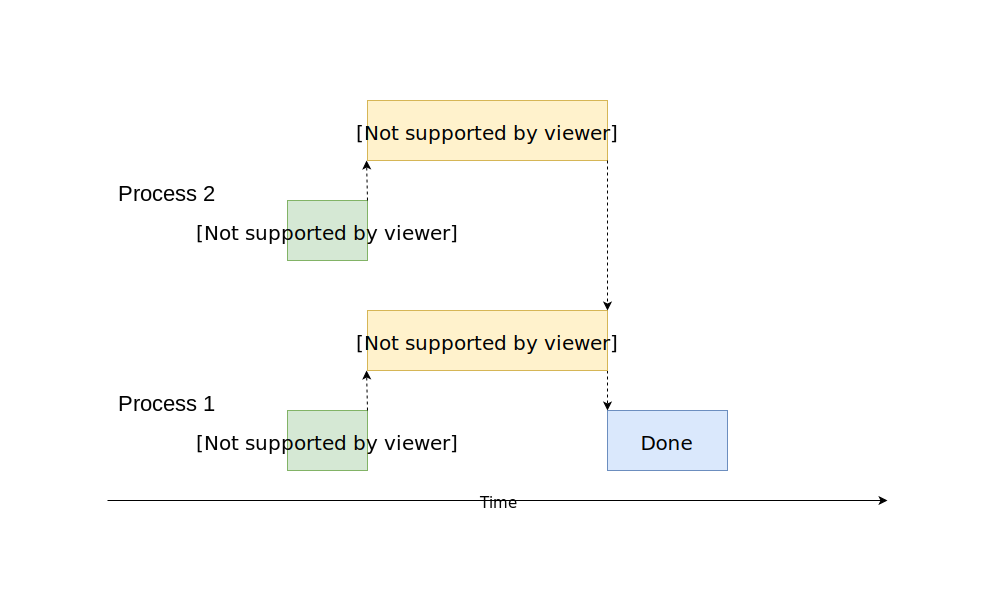

In [21]:
from IPython.display import SVG
SVG("multiprocessing-2.svg")

Here the tasks do run concurrently in true manner i.e at the same time on different processes unlike as in multithreading where it juts appaers as if the tasks are running concurrently but in reality they don't.

- Note: It is now mentioned in the docs for ProcessPoolExecutor that multiprocessing will not work in interactive consoles. It says The main module must be importable by worker subprocesses. This means that ProcessPoolExecutor will not work in the interactive interpreter. 

In [24]:
#running async - Snippet 2
import multiprocessing
import time

start = time.perf_counter()


def do_something():
    print('Sleeping 1 second(s)...')
    time.sleep(1)
    print('Done Sleeping...')

p1 = multiprocessing.Process(target=do_something)
p2 = multiprocessing.Process(target=do_something)

p1.start()
p2.start()

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 0.06 second(s)


In [37]:
#running async - Snippet 2
import multiprocessing
import time

start = time.perf_counter()


def do_something():
    print('Sleeping 1 second(s)...')
    time.sleep(1)
    print('Done Sleeping...')

if __name__ == '__main__':
    
    p1 = multiprocessing.Process(target=do_something)
    p2 = multiprocessing.Process(target=do_something)

    p1.start()
    p2.start()

    p1.join()
    p2.join()

    finish = time.perf_counter()

    print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 0.35 second(s)


In [38]:
#running async - Snippet 4
import multiprocessing
import time

start = time.perf_counter()


def do_something():
    print('Sleeping 1 second(s)...')
    time.sleep(1)
    print('Done Sleeping...')

if __name__ == '__main__':
    processes = []

    for _ in range(10):
        t = multiprocessing.Process(target=do_something)
        t.start()
        processes.append(t)

    #Because we can't go .join() within above for loop because it would lead to problem as in Snippet 2
    for process in processes:
        process.join()
        

    finish = time.perf_counter()

    print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 0.76 second(s)


In [41]:
# Above implementation doesn't accept arguments - Snippet 5
import multiprocessing
import time

def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    print('Done Sleeping...')

if __name__ == '__main__':
    start = time.perf_counter()
    threads = []
    for _ in range(10):
        t = multiprocessing.Process(target=do_something,args=[5])
        t.start()
        threads.append(t)

    #Because we can't go .join() within above for loop because it would lead to problem as in Snippet 2
    for t in threads:
        t.join()
        

    finish = time.perf_counter()

    print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 0.82 second(s)


In [ ]:
# More efficent way of implementation - Snippet 6
import concurrent.futures
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return 'Done Sleeping...'

if __name__ == '__main__':
    with concurrent.futures.ProcessPoolExecutor() as executor:
        f1=executor.submit(do_something, 1) #used if function has to be executed once. It schedules the function to be executed and returns a future object.
        f2=executor.submit(do_something, 1)
        print(f1.result())
        print(f2.result())

    finish = time.perf_counter()

    print(f'Finished in {round(finish-start, 2)} second(s)')



In [ ]:
import concurrent.futures
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return 'Done Sleeping...'

def main():

    with concurrent.futures.ProcessPoolExecutor() as executor:
        results =[executor.submit(do_something, 1) for _ in range(10)]

        for f in concurrent.futures.as_completed(results):
            print(f.result())


    finish = time.perf_counter()

    print(f'Finished in {round(finish-start, 2)} second(s)')

if __name__ == '__main__':
    main()

In [ ]:
import concurrent.futures
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping...{seconds}'

def main():

    with concurrent.futures.ProcessPoolExecutor() as executor:
        secs = [5, 4, 3, 2, 1]
        results = executor.map(do_something, secs)

    for result in results:
        print(result)

    finish = time.perf_counter()

    print(f'Finished in {round(finish-start, 2)} second(s)')

if __name__ == '__main__':
    main()

In [ ]:
import time
from PIL import Image, ImageFilter

img_names = [
    'temp2.png',
    'template3.png',
    'temp5.jpg',
    'temp4.jpg'
]

t1 = time.perf_counter()

size = (1200, 1200)


for img_name in img_names:
    img = Image.open(img_name)

    img = img.filter(ImageFilter.GaussianBlur(15))

    img.thumbnail(size)
    img.save(f'processed/{img_name}')
    print(f'{img_name} was processed...')

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

In [ ]:
import time
import concurrent.futures
from PIL import Image, ImageFilter

img_names = [
    'temp2.png',
    'template3.png',
    'temp5.jpg',
    'temp4.jpg'
]

t1 = time.perf_counter()

size = (1200, 1200)


def process_image(img_name):
    img = Image.open(img_name)

    img = img.filter(ImageFilter.GaussianBlur(15))

    img.thumbnail(size)
    img.save(f'Template matching/{img_name}')
    print(f'{img_name} was processed...')


with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(process_image, img_names)


t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')